## read files

In [167]:
import os
import re
import pandas as pd
import pycountry

In [168]:
focus_year = "1970-2018"
data_folder = "../data/Converted sessions/"
filename_pattern = re.compile(r"^(?P<country>[A-Z]{2,4})_[0-9]{2}_(?P<year>[0-9]{4}).txt$", re.VERBOSE)

docs=[]
files = {}
countries = {}
years = {}
countries_years = {}

for root, directories, filenames in os.walk(data_folder):
    for filename in filenames: 
        match = filename_pattern.match(filename)
        if match:
            path = os.path.join(root,filename)
            with open (path,encoding='utf8',errors='ignore') as fin:
                if re.match(filename_pattern, filename):
                    doc=fin.read().strip('\n\t')
                    docs.append(doc) 
                
            (country, year) = (match.group('country'), match.group('year'))
            try:
                country_name = pycountry.countries.get(alpha_3=country).name
            except:
                country_name = country
            files[path] = {'country' : country_name, 'year' : year}
            countries[country_name] = countries.get(country_name,0) + 1
            years[year] = years.get(year,0) + 1
            if country_name in countries_years.keys():
                countries_years[country_name][year] = countries_years[country_name].get(year,0) + 1
            else:
                countries_years[country_name] = {year : 1}

print("There are %d speeches in total" % (len(files.keys())))

There are 8093 speeches in total


docs is **list** of txt content 

files are **dict** {path:{counrty,year}}

In [ ]:
files

In [ ]:
files['../data/Converted sessions/Session 25 - 1970\\ALB_25_1970.txt']['country']
files['../data/Converted sessions/Session 25 - 1970\\ALB_25_1970.txt']

- countries/years is **dict** {counrty: number of speech}
- countries_years is **dict** {country: {year: number of speech} }

In [ ]:
countries['Albania']

In [ ]:
years['1970']

In [ ]:
n_speech = len(files.keys())

## sentiment analysis based on unsupurvised learning

break full speech into sentences

In [169]:
from afinn import Afinn

In [170]:
def sentence_split(str_centence):
    list_ret = []
    for s_str in str_centence.split('.'):
        if '?' in s_str:
            list_ret.extend(s_str.split('?'))
        elif '!' in s_str:
            list_ret.extend(s_str.split('!'))
        else:
            list_ret.append(s_str)
    return list_ret

3 index show sentiment polarity

In [171]:
afinn = Afinn(language='en')

In [172]:
pos_index = []
neg_index = []
neutral_index = []

- Core of the analysis
- compute the indexs of each sentence, compute the overall indexs of each speech by averaging sentence index in this speech

In [173]:
for i in range(n_speech):
    lines = sentence_split(docs[i])
    pos = 0
    neg = 0
    neutral = 0
    
    for line in lines:
        score = int(afinn.score(line))
        
        if score > 0:
            pos += 1
        elif score < 0:
            neg += 1
        else:
            neutral += 1
        
    n = len(lines)
    pos_index.append(pos / n)
    neg_index.append(neg / n)
    neutral_index.append(neutral / n)

In [ ]:
print(len(pos_index))
#neg_index 
#neutral_index 

compute the mean indexs of a year

In [174]:
def getTotalIndex(index):
    indexPerYear = np.zeros(len(years.keys()))
    count = 0
    cur = 0
    for i in years.keys():
        for j in range(years[i]):
            indexPerYear[count] += index[cur]
            cur += 1
        indexPerYear[count] /= j
        count += 1
    return indexPerYear

to do Or not

- sentiment index trend regarding of countries
- sentiment index trend per country VS economic/puluution/.. trend per country

visualize the index trend

In [175]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

In [176]:
totPos = getTotalIndex(pos_index)
totNeg = getTotalIndex(neg_index )
totNeu = getTotalIndex(neutral_index)

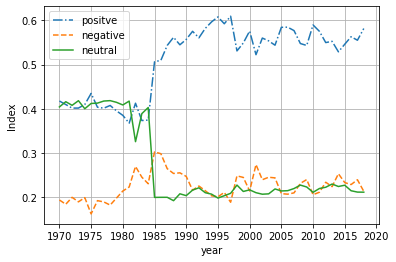

In [177]:
X = np.arange(1970,2019)
plt.plot(X,totPos,'-.',label='positve')
plt.plot(X,totNeg, '--',label='negative')
plt.plot(X,totNeu,'-',label='neutral')
plt.legend()
plt.xticks(X)
plt.xlabel('year')
plt.ylabel('Index')
plt.grid()
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(5))
plt.savefig('../output/sentimentYearTrend.png')
plt.show()